In [1]:
# Import all of the necessary libraries to start 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import binarize

In [2]:
bank = pd.read_csv("bankfullcleaned.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,0,0,0,0,882,0,0,0,21,0,39,1,151,3,0,0
1,33,1,0,1,0,3444,1,0,0,21,0,144,1,91,4,0,1
2,36,2,0,0,0,0,1,0,0,23,0,140,1,143,3,0,1
3,51,0,1,1,0,3132,0,0,0,5,1,449,1,176,1,0,0
4,33,3,2,1,0,1005,1,0,0,10,1,175,1,174,2,0,0


In [3]:
# Use min/max feature scaling to normalize the dataset
minmaxscaler = preprocessing.MinMaxScaler(feature_range = (0,1))
bank = minmaxscaler.fit_transform(bank)
bank = pd.DataFrame(bank, columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'])
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.214286,0.0,0.0,0.0,0.0,0.033290,0.0,0.0,0.0,0.666667,0.000000,0.015357,0.0,0.172414,0.037037,0.0,0.0
1,0.214286,0.1,0.0,0.5,0.0,0.064125,1.0,0.0,0.0,0.666667,0.000000,0.062782,0.0,0.103448,0.055556,0.0,1.0
2,0.257143,0.2,0.0,0.0,0.0,0.022675,1.0,0.0,0.0,0.733333,0.000000,0.060976,0.0,0.163218,0.037037,0.0,1.0
3,0.471429,0.0,0.5,0.5,0.0,0.060370,0.0,0.0,0.0,0.133333,0.090909,0.200542,0.0,0.201149,0.000000,0.0,0.0
4,0.214286,0.3,1.0,0.5,0.0,0.034770,1.0,0.0,0.0,0.300000,0.090909,0.076784,0.0,0.198851,0.018519,0.0,0.0


In [4]:
bank_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
x = bank[bank_cols]
y = bank.y

In [5]:
# Split data into training and testing sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Fit training dataset to logistic regression model 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# Predict the outcomes using the training data 
y_pred_class = lr.predict(x_test)
from sklearn import metrics 
print ("The Accuracy Rate is", (metrics.accuracy_score(y_test, y_pred_class)*100))

The Accuracy Rate is 83.5193696651346


In [8]:
# Import Confusion Matrix Libraries 
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

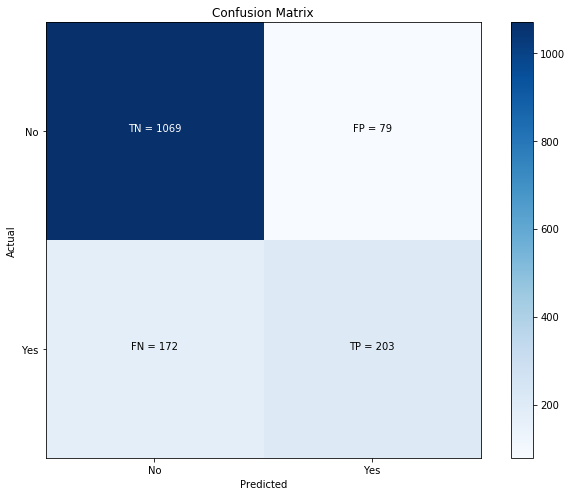

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.clf()
plt.figure(figsize = (9, 7))
plt.imshow(cm, interpolation='nearest', cmap = 'Blues')
plt.colorbar()
classNames = ['No','Yes']
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 1.5 if s else cm.max() / 2
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+format(cm[i][j]), 
                 horizontalalignment ="center", 
                 color ="white" if cm[i][j] > thresh else "black")       
plt.tight_layout()
plt.show()

In [10]:
# Confusion Matrix Stats
TN = 1069 
FN = 172 
FP = 79
TP = 203

# Classification Table Metrics
Sensitivity = (TP/(TP+FN)) 
Specificity = (TN/(TN+FP))
Precision = (TP/(TP+FP))
False_Positive_Rate = (FP/251)
Misclassification_Rate = (FP+FN)/(1523)
Accuracy = (TP + TN)/(1523)

# Put the confusion matrix stats and metrics into a dataframe for easy reading and interpretation
cm_d = {'Sensitivity': [(TP/(TP+FN))*100], 'Specificity': [(TN/(TN+FP))*100], 'Precision': [(TP/(TP+FP))*100], 'False_Positive_Rate': [(FP/251)*100], 'Misclassification_Rate': [(FP+FN)/(1523)*100], 'Accuracy': [(TP + TN)/(1523)*100]}
cm_metrics = pd.DataFrame(data = cm_d)
cm_metrics.transpose()



,0
Accuracy,83.519370
False_Positive_Rate,31.474104
Misclassification_Rate,16.480630
Precision,71.985816
Sensitivity,54.133333
Specificity,93.118467


Text(0.5,1,'Histogram')

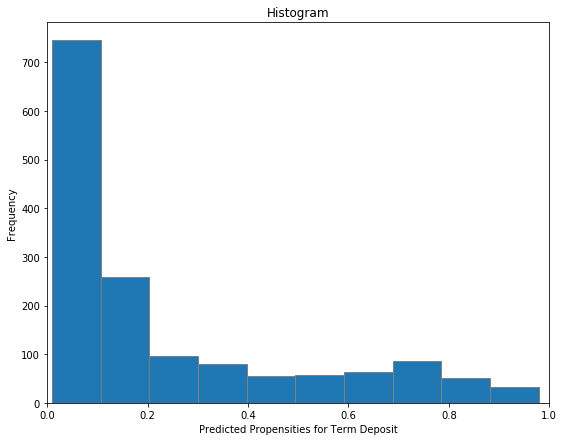

In [11]:
# Print the first 10 predicted outcomes (0, 1)
lr.predict(x_test)[0:10]

#%%
# Print the first 10 propensity percentages 
lr.predict_proba(x_test)[0:10]
#%%
lr.predict_proba(x_test)[:10, 1]
#%%
# Save all the probabilistic outcomes and create histogram
plt.figure(figsize = (9, 7))
bond_prob = lr.predict_proba(x_test)[:, 1]
plt.hist(bond_prob, edgecolor = 'gray', bins = 10)
plt.xlim(0, 1)
plt.ylabel('Frequency')
plt.xlabel('Predicted Propensities for Term Deposit')
plt.title('Histogram')

Using matplotlib backend: MacOSX


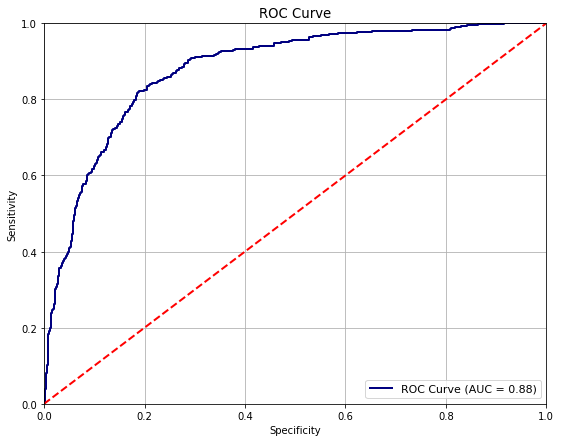

In [12]:
# ROC Curve 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib

fpr, tpr, thresholds = metrics.roc_curve(y_test, bond_prob)
roc_auc = auc(fpr, tpr)

plt.clf()
plt.figure(figsize = (9, 7))
plt.plot(fpr, tpr, color='navy',
         lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 11
plt.title('ROC Curve')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [13]:
# Area Under the Curve  
print(metrics.roc_auc_score(y_test, bond_prob))

0.8793147502903601


In [14]:
def th(threshold):
    print ('Sensitivity:', tpr[thresholds > threshold][-1])
    print ('Specificity:', 1 - fpr[thresholds > threshold][-1])

th(0.5)
th(0.4)
th(0.3)

Sensitivity: 0.5413333333333333
Specificity: 0.9329268292682926
Sensitivity: 0.6133333333333333
Specificity: 0.9050522648083623
Sensitivity: 0.712
Specificity: 0.8649825783972125
